In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_score
%matplotlib inline

In [38]:
df=pd.read_csv("Auto-1.csv")
df

,Car Name,Miles Per Gallon (MPG),Number of Cylinders,Horsepower,Weight,Model Year
0,chevrolet chevelle malibu,18.0,8,130,3504,70
1,buick skylark 320,15.0,8,165,3693,70
2,plymouth satellite,18.0,8,150,3436,70
3,amc rebel sst,16.0,8,150,3433,70
4,ford torino,17.0,8,140,3449,70
...,...,...,...,...,...,...
387,ford mustang gl,27.0,4,86,2790,82
388,vw pickup,44.0,4,52,2130,82
389,dodge rampage,32.0,4,84,2295,82
390,ford ranger,28.0,4,79,2625,82


# I have dropped the following columns and worked with the rest of the columns

In [43]:
df.drop('Car Name', axis='columns',inplace=True)1

In [44]:
df.drop('Model Year', axis='columns',inplace=True)

In [45]:
df.drop('Weight', axis='columns',inplace=True)

In [46]:
df

,Miles Per Gallon (MPG),Number of Cylinders,Horsepower
0,18.0,8,130
1,15.0,8,165
2,18.0,8,150
3,16.0,8,150
4,17.0,8,140
...,...,...,...
387,27.0,4,86
388,44.0,4,52
389,32.0,4,84
390,28.0,4,79


# DETERMINING K-value USING ELBOW METHOD


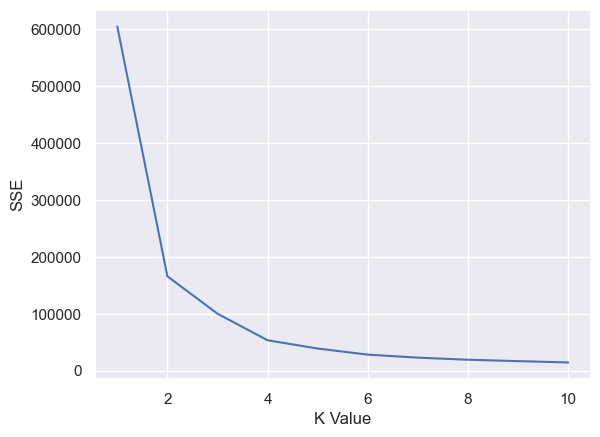

In [57]:
sse=[]
k_range=range(1,11)
for k in k_range:
    km=KMeans(n_clusters=k, random_state=0)
    km.fit(df)
    sse.append(km.inertia_)
    
plt.xlabel('K Value')
plt.ylabel('SSE')
plt.plot(k_range,sse)

From the above elbow method we determine the k value as 2

In [58]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [59]:
df['clusters']=y_predicted

In [61]:
df.tail()

,Miles Per Gallon (MPG),Number of Cylinders,Horsepower,clusters
387,27.0,4,86,0
388,44.0,4,52,0
389,32.0,4,84,0
390,28.0,4,79,0
391,31.0,4,82,0


In [72]:
km.cluster_centers_

array([[ 26.42233677,   4.62199313,  85.00687285],
       [ 14.87029703,   7.92079208, 160.54455446]])

Text(0, 0.5, 'Mileage')

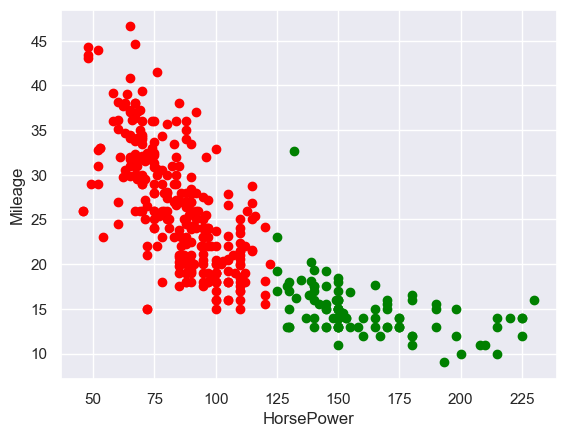

In [77]:
df1=df[df.clusters==0]
df2=df[df.clusters==1]

plt.scatter(df1.Horsepower,df1['Miles Per Gallon (MPG)'],color='red')
plt.scatter(df2.Horsepower,df2['Miles Per Gallon (MPG)'],color='green')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('HorsePower')
plt.ylabel('Mileage')



In [74]:
km.cluster_centers_

array([[ 26.42233677,   4.62199313,  85.00687285],
       [ 14.87029703,   7.92079208, 160.54455446]])

In the above scatter plot we can see two clear clusters. One cluster(red) has data points which have a "Horsepower" ranging from 40-125 and "Mileage" ranging from 15-50. 

The other cluster(green)has data points which have a "Horsepower" ranging from 125-240 and "Mileage" ranging from 5-25

The K value that I have chosen according to elbow method is K=2. 
From the scatter plot above, we can see the clear distinction of clusters based on their "HorsePower" and "Mileage" of the given automobile list.